# Missing Data in Machine Learning

---

## Definition
- **Missing data** occurs when some feature values in the dataset are **not recorded or unavailable**.
- Can affect model performance if not handled properly.

---

## Common Handling Methods
1. **Remove missing data**  
   - Drop rows or columns with missing values  
   - Simple but may **lose data**
2. **Imputation**  
   - Fill missing values with:  
     - Mean / Median / Mode  
     - Predicted value (using ML model)  
3. **Special value**  
   - Assign a placeholder like `-1` or `Unknown`  
4. **Advanced Methods**  
   - KNN imputation, Iterative imputation

---

## Mini Example

| Customer ID | Age | Annual Income (₹) | Spending Score |
|-------------|-----|-----------------|----------------|
| 1           | 22  | 30,000          | 80             |
| 2           | ?   | 35,000          | 75             |
| 3           | 45  | ?               | 20             |
| 4           | 40  | 65,000          | ?              |

**Goal:** Handle missing `Age`, `Income`, `Spending Score` before training the model.

---

## Daily-Life Analogy
- Imagine **a class attendance sheet** where some students didn’t sign:  
  - You **cannot calculate total attendance correctly** unless you fill the blanks or handle missing entries properly.


# Types of Missing Data in ML

---

## 1. MCAR (Missing Completely At Random)
- **Definition:** Missing values occur **completely randomly**, unrelated to any other data.
- **Example:** Sensor malfunction skips temperature readings randomly.
- **Effect:** Safe to delete rows; unbiased.

---

## 2. MAR (Missing At Random)
- **Definition:** Missingness depends on **other observed variables**, not the missing value itself.
- **Example:** Income missing more for younger people in a survey.
- **Effect:** Can use imputation using other features.

---

## 3. MNAR (Missing Not At Random)
- **Definition:** Missingness depends on **the value itself**.
- **Example:** People with high income may choose **not to disclose** it.
- **Effect:** Harder to handle; may need advanced imputation or modeling.

---

## Mini Dataset Example

| Customer ID | Age | Annual Income (₹) | Spending Score |
|-------------|-----|-----------------|----------------|
| 1           | 22  | 30,000          | 80             |
| 2           | ?   | 35,000          | 75             |
| 3           | 45  | ?               | 20             |
| 4           | 40  | 65,000          | ?              |

- `?` in Age → Could be **MCAR or MAR**  
- `?` in Income → Could be **MNAR** (high earners hiding income)

---

## Daily-Life Analogy
- Think of **a classroom survey**:  
  - MCAR: Random students absent that day  
  - MAR: Younger students skip answering certain questions  
  - MNAR: Students hiding their actual grades intentionally

---

# Missing Value Treatment in ML

---

## Definition
- Process of **handling missing values** in a dataset before training a model.
- Ensures models **perform accurately** and avoid bias.

---

## Common Methods

### 1. Remove Missing Data
- Drop rows or columns with missing values.
- **Pros:** Simple, easy to implement  
- **Cons:** Loss of data  
- **Use Case:** When few missing values exist

### 2. Imputation
- Fill missing values with **statistical measures** or predictions:
  - **Mean / Median / Mode** (numeric data)  
  - **Most frequent value** (categorical data)  
  - **Predictive models** (KNN, Regression, Iterative Imputer)

### 3. Placeholder / Special Value
- Replace missing entries with a **specific value** like `-1`, `0`, or `"Unknown"`  
- **Use Case:** When missing itself has meaning

### 4. Advanced Techniques
- **KNN Imputation:** Predict missing value using nearest neighbors  
- **Iterative Imputation:** Predict missing value using multiple regression on other features  
- **Multiple Imputation:** Generate multiple plausible values and combine

---

## Daily-Life Analogy
- **Filling blanks in a survey**:  
  - Some blanks can be ignored (drop rows)  
  - Some can be guessed based on others (imputation)  
  - Some can be marked as "Unknown" if missing itself matters  

---

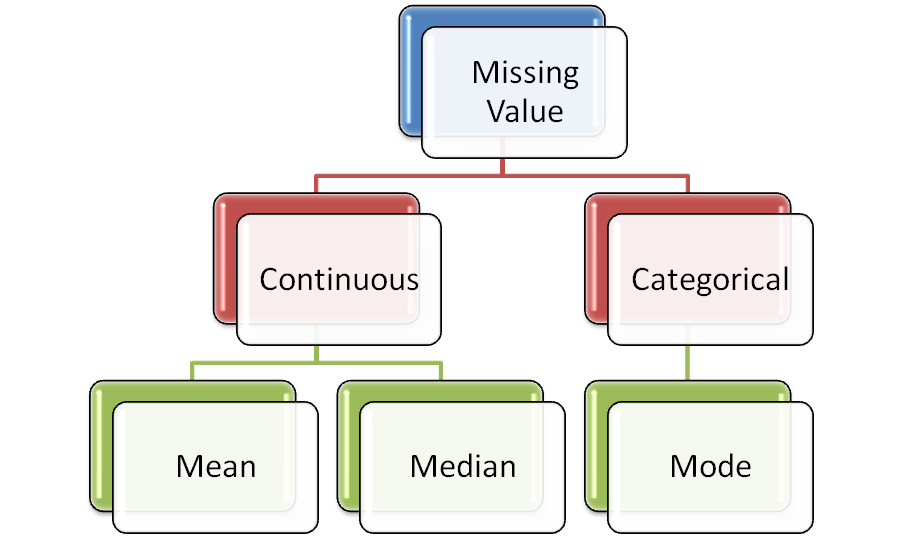


## Mini Dataset Example

| Customer ID | Age | Annual Income (₹) | Spending Score |
|-------------|-----|-----------------|----------------|
| 1           | 22  | 30,000          | 80             |
| 2           | ?   | 35,000          | 75             |
| 3           | 45  | ?               | 20             |
| 4           | 40  | 65,000          | ?              |

**Treatment Example:**  
- Replace missing Age with **median**  
- Replace missing Income with **mean**  
- Replace missing Spending Score with **mode** or predictive model  

---


>NOTE : 

> If the outlier treatment is not done, then impute missing value with median.

> If any column has missing value > 40%, drop the column.

> Impute the missing value with a random number or with a value which is not possible.

# Implementation 1

In [14]:
# Create a simple dataset with missing value.
import pandas as pd
import numpy as np

data = {
        'A': [1,2,100,4,5],
        'B': [3, np.nan, 7,8,9],
        'C': [np.nan,11, 13,14,15],
        'D': [16,17,18,np.nan,20]
        }
data

{'A': [1, 2, 100, 4, 5],
 'B': [3, nan, 7, 8, 9],
 'C': [nan, 11, 13, 14, 15],
 'D': [16, 17, 18, nan, 20]}

In [15]:
# Convert the dictionary to pandas data frame
df = pd.DataFrame(data)
print("Original Data Frame : ")
print(df)

Original Data Frame : 
     A    B     C     D
0    1  3.0   NaN  16.0
1    2  NaN  11.0  17.0
2  100  7.0  13.0  18.0
3    4  8.0  14.0   NaN
4    5  9.0  15.0  20.0


In [16]:
# Checking null 
df.isnull().sum()

A    0
B    1
C    1
D    1
dtype: int64

In [17]:
# Drop rows which has null value
df.dropna()

,A,B,C,D
2,100,7.0,13.0,18.0
4,5,9.0,15.0,20.0


In [18]:
# Drop column which has null value
df.dropna(axis=1)

,A
0,1
1,2
2,100
3,4
4,5


In [19]:
# Impute missing value with Mean
df['B'].mean()

np.float64(6.75)

In [20]:
df['B'].fillna(df['B'].mean())

0    3.00
1    6.75
2    7.00
3    8.00
4    9.00
Name: B, dtype: float64

In [21]:
# Impute missing value with Median
df['B'].median()

np.float64(7.5)

In [22]:
df['B'].fillna(df['B'].median())

0    3.0
1    7.5
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [23]:
# Impute missing value with Constant
df['C'].fillna(0)

0     0.0
1    11.0
2    13.0
3    14.0
4    15.0
Name: C, dtype: float64

In [24]:
# Impute missing value with String
df['C'].fillna("Some String")

0    Some String
1           11.0
2           13.0
3           14.0
4           15.0
Name: C, dtype: object

# Implementation 2

In [28]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
#Checking null
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [31]:
df.shape

(891, 15)

In [32]:
# Dropping null values from row
df.dropna().shape

(182, 15)

In [33]:
# Dropping null values from column
df_update = df.dropna(axis=1)

In [36]:
df_update.shape

(891, 11)

In [37]:
#Impute Missing Value
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [38]:
df.isnull().sum()  # age is missing at random

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

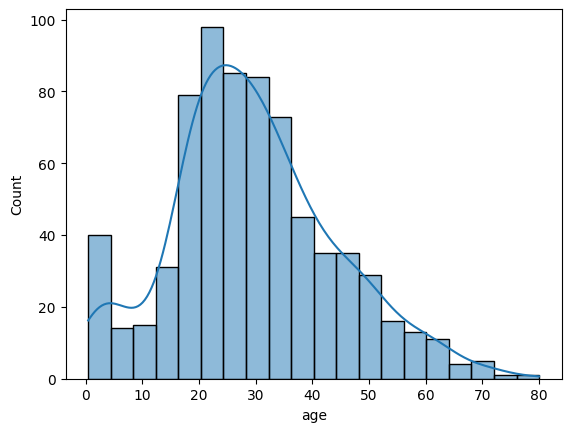

In [40]:
sns.histplot(df.age, kde=True)
# Almost normal distribution

In [44]:
# Whenever we have normal distribution with no outlier, Impute the missing value with Mean
df['MeanImputation'] = df['age'].fillna(df['age'].mean())
df[['age', 'MeanImputation']]

,age,MeanImputation
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


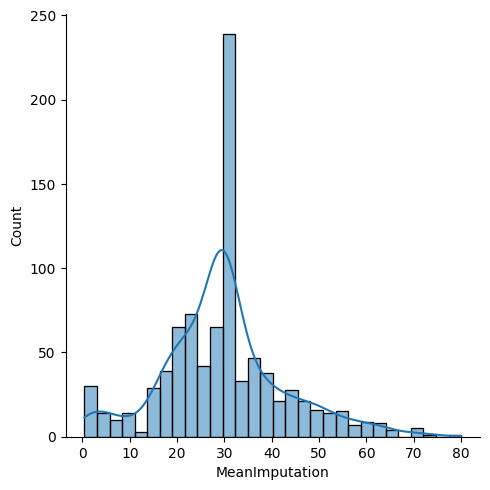

In [45]:
sns.displot(df['MeanImputation'], kde= True)

In [46]:
# Mean Imputation works well with Normal Distribution Data where no outlier present

In [47]:
# For median imputation
df['MedianImputation'] = df['age'].fillna(df['age'].median())
df[['age', 'MeanImputation', 'MedianImputation']]

,age,MeanImputation,MedianImputation
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


In [48]:
# Impute missing value with categorical data
df.isnull().sum()

survived              0
pclass                0
sex                   0
age                 177
sibsp                 0
parch                 0
fare                  0
embarked              2
class                 0
who                   0
adult_male            0
deck                688
embark_town           2
alive                 0
alone                 0
MeanImputation        0
MedianImputation      0
dtype: int64

In [49]:
df['embarked']  #MCAR

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [50]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [51]:
# How many non null values are there?
df.notna().sum()

survived            891
pclass              891
sex                 891
age                 714
sibsp               891
parch               891
fare                891
embarked            889
class               891
who                 891
adult_male          891
deck                203
embark_town         889
alive               891
alone               891
MeanImputation      891
MedianImputation    891
dtype: int64

In [52]:
df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [53]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [54]:
mode_value

'S'

In [55]:
df['embarked'].fillna(mode_value)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object